# ANALISIS KLASTER TEKS DENGAN K-MEANS & ELBOW

In [8]:
import pandas as pd 
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords

In [9]:
import pandas as pd

# Membaca file CSV
df = pd.read_csv("Scraping_HeroCom.csv")

# Mengatur agar teks panjang tampil penuh
pd.set_option('display.max_colwidth', None)

display(df)
display(df.head(10))


,nama_penulis,rating,teks_ulasan,waktu,likes
0,MUHAMMAD HIBZAH DASA OKKA,5.0,"Mantap, laptop mereka second hand tapi baramg seperti baru.\nKarena mereka memang ambil laptop yang umurnya masih muda, saya beli laptop amd ryzen 7 tahun 2024, di harga 6,7 juta.\nPelayanan excelent, barang juga excelent.\nSemoga awet",a month ago,0
1,Wafa Wardana,5.0,Terbaik. Pilihan utama laptop secondhand berkualitas. Dijelaskan oleh mas nya dgn sabar dan jujur. Offline store nyaman dan sejuk. Top markotop,4 months ago,0
2,Azka Rusyda Farsya Kusmayadi,5.0,"Beli laptop disini udah yang ke 2x nya udah beli 3 unit total, bagus banget tokonya, masnya juga informatif. Good Job!!",2 months ago,0
3,neviestaa,5.0,"Pengalaman belanja di Hero bener-bener memuaskan. Dari awal tanya-tanya, adminnya sabar jelasin detail laptop sampai akhirnya aku nemu yang paling pas sama kebutuhan kuliah. Prosesnya cepat, barang datang sesuai deskripsi, kondisi mulus dan ori. Harganya juga lebih bersahabat dibanding toko lain yang aku bandingin sebelumnya. Next kalau upgrade laptop, pasti balik lagi ke Hero",a month ago,0
4,Surya Ramadhani,5.0,"Barang-barang yang di jual bagus² dan masih pada mulus², tempet nya nyaman dan penjual nya pada ramah² dan sangat komunikatif",2 months ago,0
...,...,...,...,...,...
1448,Taufiq Agung Pambudi,5.0,NaN,3 years ago,0
1449,Yeni Nur Prilanita,5.0,NaN,3 years ago,0
1450,Elya Artha,4.0,NaN,4 years ago,0
1451,RENJIS FARHAN,5.0,NaN,4 years ago,0


,nama_penulis,rating,teks_ulasan,waktu,likes
0,MUHAMMAD HIBZAH DASA OKKA,5.0,"Mantap, laptop mereka second hand tapi baramg seperti baru.\nKarena mereka memang ambil laptop yang umurnya masih muda, saya beli laptop amd ryzen 7 tahun 2024, di harga 6,7 juta.\nPelayanan excelent, barang juga excelent.\nSemoga awet",a month ago,0
1,Wafa Wardana,5.0,Terbaik. Pilihan utama laptop secondhand berkualitas. Dijelaskan oleh mas nya dgn sabar dan jujur. Offline store nyaman dan sejuk. Top markotop,4 months ago,0
2,Azka Rusyda Farsya Kusmayadi,5.0,"Beli laptop disini udah yang ke 2x nya udah beli 3 unit total, bagus banget tokonya, masnya juga informatif. Good Job!!",2 months ago,0
3,neviestaa,5.0,"Pengalaman belanja di Hero bener-bener memuaskan. Dari awal tanya-tanya, adminnya sabar jelasin detail laptop sampai akhirnya aku nemu yang paling pas sama kebutuhan kuliah. Prosesnya cepat, barang datang sesuai deskripsi, kondisi mulus dan ori. Harganya juga lebih bersahabat dibanding toko lain yang aku bandingin sebelumnya. Next kalau upgrade laptop, pasti balik lagi ke Hero",a month ago,0
4,Surya Ramadhani,5.0,"Barang-barang yang di jual bagus² dan masih pada mulus², tempet nya nyaman dan penjual nya pada ramah² dan sangat komunikatif",2 months ago,0
5,Muhammad Alfian Nurkholis,5.0,"Jual beli laptop second hand bagus.. Offline storenya nyaman, ber-AC. Pelayanannya pun bagus. Alhamdulillah dapat good deal juga 👍",2 months ago,0
6,Akmal Soffal,5.0,"Mantap pelayanan ramah, tempat bersih nyaman, unit banyak pilihan sesuai harga dan kebutuhan",2 months ago,0
7,Indira Surya,5.0,Pelayanan oke\nBarang ori masih garansi resmi\nSukses selalu,a month ago,0
8,Rosa Ochaa,5.0,"Konsultasi cari laptop untuk pekerjaan utama, akhirnya disini menemukan laptop second yg cocok, bagus, dan terpercaya.. untuk menentukan pilihan laptop dibantu oleh staf yg sangat komunikatif dan solutif.. di toko ini rekomendasi utama untuk cari laptop terumama bagi pekerja, mahasiswa, pebisnis, dll.. terima kasih hero computer 🙏😊",5 months ago,0
9,Fan Bs.,5.0,"Semua tersedia disini, pelayanannya juga bagus. Di kasih tau apa yang aku ngga tau. Dan harga juga termasuk harga yg bersahabat bgt.",a month ago,0


#PRE-PROCESSING

In [12]:
# Import library yang dibutuhkan
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Download resource NLTK (cukup sekali)
nltk.download('stopwords')

# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stopwords bahasa Indonesia
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing teks
def preprocess(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())  # lowercase & hapus simbol
    tokens = text.split()                               # tokenisasi
    filtered = [w for w in tokens if w not in stop_words]  # hapus stopword
    stemmed = [stemmer.stem(w) for w in filtered]       # stemming
    return ' '.join(stemmed)

# Terapkan preprocessing pada kolom teks ulasan
df['stemmed'] = df['teks_ulasan'].apply(preprocess)

# Tampilkan hasil preprocessing
pd.set_option('display.max_colwidth', None)
display(df[['teks_ulasan', 'stemmed']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,teks_ulasan,stemmed
0,"Mantap, laptop mereka second hand tapi baramg seperti baru.\nKarena mereka memang ambil laptop yang umurnya masih muda, saya beli laptop amd ryzen 7 tahun 2024, di harga 6,7 juta.\nPelayanan excelent, barang juga excelent.\nSemoga awet",mantap laptop second hand baramg ambil laptop umur muda beli laptop amd ryzen harga juta layan excelent barang excelent moga awet
1,Terbaik. Pilihan utama laptop secondhand berkualitas. Dijelaskan oleh mas nya dgn sabar dan jujur. Offline store nyaman dan sejuk. Top markotop,baik pilih utama laptop secondhand kualitas mas nya dgn sabar jujur offline store nyaman sejuk top markotop
2,"Beli laptop disini udah yang ke 2x nya udah beli 3 unit total, bagus banget tokonya, masnya juga informatif. Good Job!!",beli laptop udah x nya udah beli unit total bagus banget toko mas informatif good job
3,"Pengalaman belanja di Hero bener-bener memuaskan. Dari awal tanya-tanya, adminnya sabar jelasin detail laptop sampai akhirnya aku nemu yang paling pas sama kebutuhan kuliah. Prosesnya cepat, barang datang sesuai deskripsi, kondisi mulus dan ori. Harganya juga lebih bersahabat dibanding toko lain yang aku bandingin sebelumnya. Next kalau upgrade laptop, pasti balik lagi ke Hero",alam belanja hero benerbener muas tanyatanya adminnya sabar jelasin detail laptop nemu pas butuh kuliah proses cepat barang sesuai deskripsi kondisi mulus ori harga sahabat banding toko bandingin next upgrade laptop hero
4,"Barang-barang yang di jual bagus² dan masih pada mulus², tempet nya nyaman dan penjual nya pada ramah² dan sangat komunikatif",barangbarang jual bagus mulus tempet nya nyaman jual nya ramah komunikatif
5,"Jual beli laptop second hand bagus.. Offline storenya nyaman, ber-AC. Pelayanannya pun bagus. Alhamdulillah dapat good deal juga 👍",jual beli laptop second hand bagus offline storenya nyaman berac layan bagus alhamdulillah good deal
6,"Mantap pelayanan ramah, tempat bersih nyaman, unit banyak pilihan sesuai harga dan kebutuhan",mantap layan ramah bersih nyaman unit pilih sesuai harga butuh
7,Pelayanan oke\nBarang ori masih garansi resmi\nSukses selalu,layan oke barang ori garansi resmi sukses
8,"Konsultasi cari laptop untuk pekerjaan utama, akhirnya disini menemukan laptop second yg cocok, bagus, dan terpercaya.. untuk menentukan pilihan laptop dibantu oleh staf yg sangat komunikatif dan solutif.. di toko ini rekomendasi utama untuk cari laptop terumama bagi pekerja, mahasiswa, pebisnis, dll.. terima kasih hero computer 🙏😊",konsultasi cari laptop kerja utama temu laptop second yg cocok bagus percaya tentu pilih laptop bantu staf yg komunikatif solutif toko rekomendasi utama cari laptop terumama kerja mahasiswa bisnis dll terima kasih hero computer
9,"Semua tersedia disini, pelayanannya juga bagus. Di kasih tau apa yang aku ngga tau. Dan harga juga termasuk harga yg bersahabat bgt.",sedia layan bagus kasih tau ngga tau harga harga yg sahabat bgt


###TRANFORMASI TF-IDF

In [14]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['stemmed'])

In [15]:
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

tfidf_df.head()

,aaaaa,aamiin,aamin,abis,ac,adek,adem,admin,adminnya,adminya,...,yess,yg,yhuks,yogyakarta,yokk,yokkk,you,youuu,yuk,zonkmantap
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188929,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###MEMBUAT MODEL K-MEANS 

In [16]:
#membuatmodel K-MEANS
Kmeans = KMeans (n_clusters=4, random_state =42, n_init =10)
Kmeans.fit(X_tfidf)
                 

KMeans(n_clusters=4, n_init=10, random_state=42)

###VISUALISASI DISTRIBUSI KLASTER

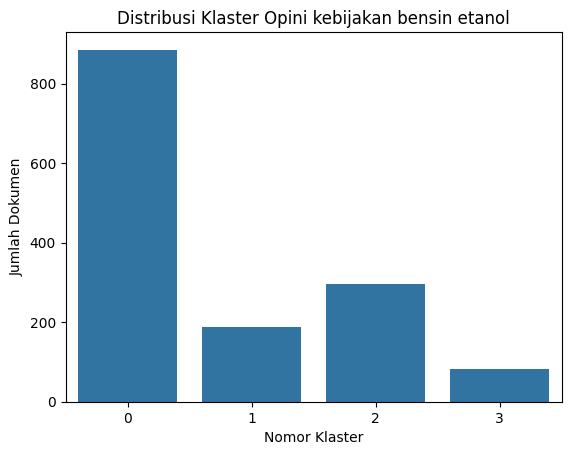

In [17]:
df['cluster'] = Kmeans.labels_
sns.countplot(x='cluster', data=df)
plt.title('Distribusi Klaster Opini kebijakan bensin etanol')
plt.xlabel('Nomor Klaster')
plt.ylabel('Jumlah Dokumen')
plt.show()

###VISUALISASI 2D DENGAN PCA 

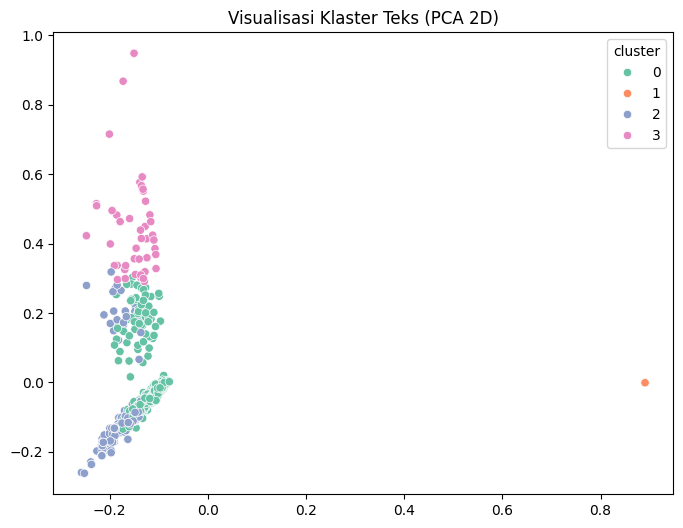

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_tfidf.toarray())
plt.figure (figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced [:,1],hue=df['cluster'],palette='Set2')
plt.title('Visualisasi Klaster Teks (PCA 2D)')
plt.show()

###Evaluasi Menggunakan SILHOUETTE SCORE

In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, Kmeans.labels_)
print(f"Silhouette Score: {score:.4f}\n")

Silhouette Score: 0.1556



k = 2, Silhouette Score = 0.0435
k = 3, Silhouette Score = 0.0341
k = 4, Silhouette Score = 0.0388
k = 5, Silhouette Score = 0.0467
k = 6, Silhouette Score = 0.0332
k = 7, Silhouette Score = 0.0522
k = 8, Silhouette Score = 0.0489
k = 9, Silhouette Score = 0.0475
k = 10, Silhouette Score = 0.0433


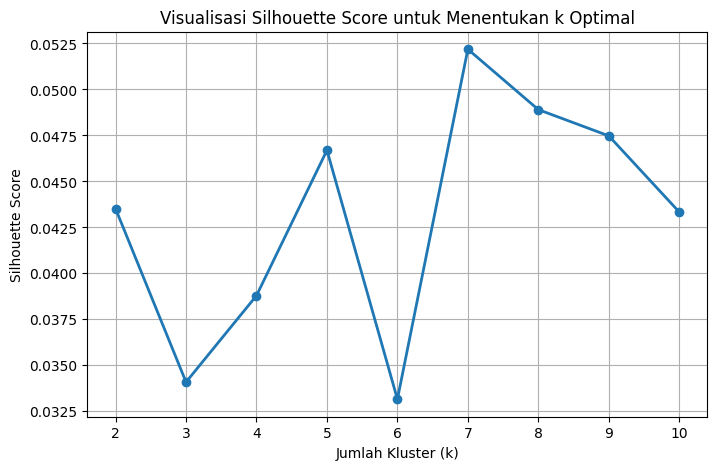

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- Rentang jumlah kluster yang akan diuji ---
range_n_clusters = range(2, 11)

# --- List untuk menyimpan hasil skor ---
silhouette_scores = []

# --- Hitung silhouette score untuk tiap k ---
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    score = silhouette_score(X_tfidf, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# --- Visualisasi hasil dalam bentuk diagram garis ---
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-', linewidth=2)
plt.title("Visualisasi Silhouette Score untuk Menentukan k Optimal")
plt.xlabel("Jumlah Kluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


#IMPLEMENTASI DENGAN ELBOW METHOD


In [12]:
inertia_values = []
K = range(2, 10)

for k in K :
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans.fit(X_tfidf)
    inertia_values.append(kmeans.inertia_)


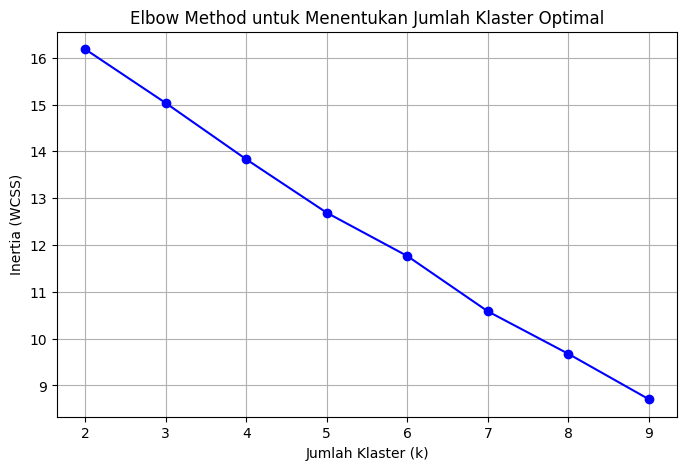

In [13]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia_values, 'bo-')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()